In [109]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from pprint import pprint

In [82]:
level_2 = pd.read_csv('./ABC_Tick_Data/ABC_Level_Two_Tick_Data.csv')
level_2['L1_Bid_Ask_Spread'] = level_2['L1_AskPrice'] - level_2['L1_BidPrice']
level_2['L1_Liquidity_Cost'] = level_2['L1_Bid_Ask_Spread']/2
level_2 = level_2.dropna()
level_2 = level_2.drop('Time_Minute',axis=1)
level_2 = level_2.drop('Instrument_Code',axis=1)
level_2 = level_2.drop('L1_Bid_Ask_Spread',axis=1)

In [83]:
level_2

,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,...,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance,L1_Liquidity_Cost
1,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,254.545455,...,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752,1.272727
2,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,26179.818180,...,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581,-3.979040
3,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,809.090909,...,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814,-6.018182
4,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,27164.727270,...,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419,-6.018182
5,2072.090909,1363.636364,30.909091,22.727273,2.272727,90.909091,45.454545,22.727273,2727.272727,2272.727273,...,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,0.129023,-6.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47338,70421.818180,86789.818180,3938.909091,44155.636360,6596.727273,1602.909091,48074.181820,29.090909,3938.909091,32.000000,...,36.991278,37.012883,37.016248,37.033862,37.036948,37.060655,37.078627,37.073496,-0.706447,0.032982
47339,13204.090910,16273.090910,738.545455,8279.181818,738.545455,300.545455,9013.909091,5.454545,738.545455,6.000000,...,37.027643,37.054079,37.076843,37.104065,37.128864,37.135494,37.222738,37.248290,-0.774880,0.072559
47340,4401.363636,5424.363636,246.181818,2759.727273,246.181818,100.181818,3004.636364,1.818182,246.181818,2.000000,...,37.068182,37.072727,37.095455,37.127273,37.159091,37.227273,37.245455,37.272727,-0.776209,0.086364
47341,11264.545450,28089.636360,7981.272727,1494.181818,3221.363636,8226.727273,267.818182,327767.090900,42387.454550,82127.545450,...,37.068182,37.082070,37.108984,37.132606,37.159098,37.245420,37.245455,37.429168,-0.409651,0.087854


In [84]:
X = level_2.loc[:, ~level_2.columns.isin(['L1_Liquidity_Cost'])].values
y = level_2['L1_Liquidity_Cost'].values

In [85]:
# Read in data as pandas dataframe and display first 5 rows
original_features = pd.get_dummies(level_2)

# Labels are the values we want to predict
original_labels = np.array(original_features['L1_Liquidity_Cost'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('L1_Liquidity_Cost', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

# The baseline predictions
baseline_preds = original_test_features[:, original_feature_list.index('Normalised_Order_Book_Imbalance')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - original_test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculate the absolute errors
errors = abs(predictions - original_test_labels)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2))

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average baseline error:  0.26
Average model error: 0.02
Improvement over baseline: 91.32 %.
Accuracy: -3.89 %.


# Feature Reduction

### Feature Importance

In [86]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: L1_AskPrice          Importance: 0.41
Variable: L1_AskSize           Importance: 0.19
Variable: L1_BidPrice          Importance: 0.18
Variable: L1_BidSize           Importance: 0.14
Variable: L2_BidSize           Importance: 0.02
Variable: L5_BidSize           Importance: 0.01
Variable: L6_BidSize           Importance: 0.01
Variable: L3_BidSize           Importance: 0.0
Variable: L4_BidSize           Importance: 0.0
Variable: L7_BidSize           Importance: 0.0
Variable: L8_BidSize           Importance: 0.0
Variable: L9_BidSize           Importance: 0.0
Variable: L10_BidSize          Importance: 0.0
Variable: L2_AskSize           Importance: 0.0
Variable: L3_AskSize           Importance: 0.0
Variable: L4_AskSize           Importance: 0.0
Variable: L5_AskSize           Importance: 0.0
Variable: L6_AskSize           Importance: 0.0
Variable: L7_AskSize           Importance: 0.0
Variable: L8_AskSize           Importance: 0.0
Variable: L9_AskSize           Importance: 0.0
Variab

### Visualise Feature Importance

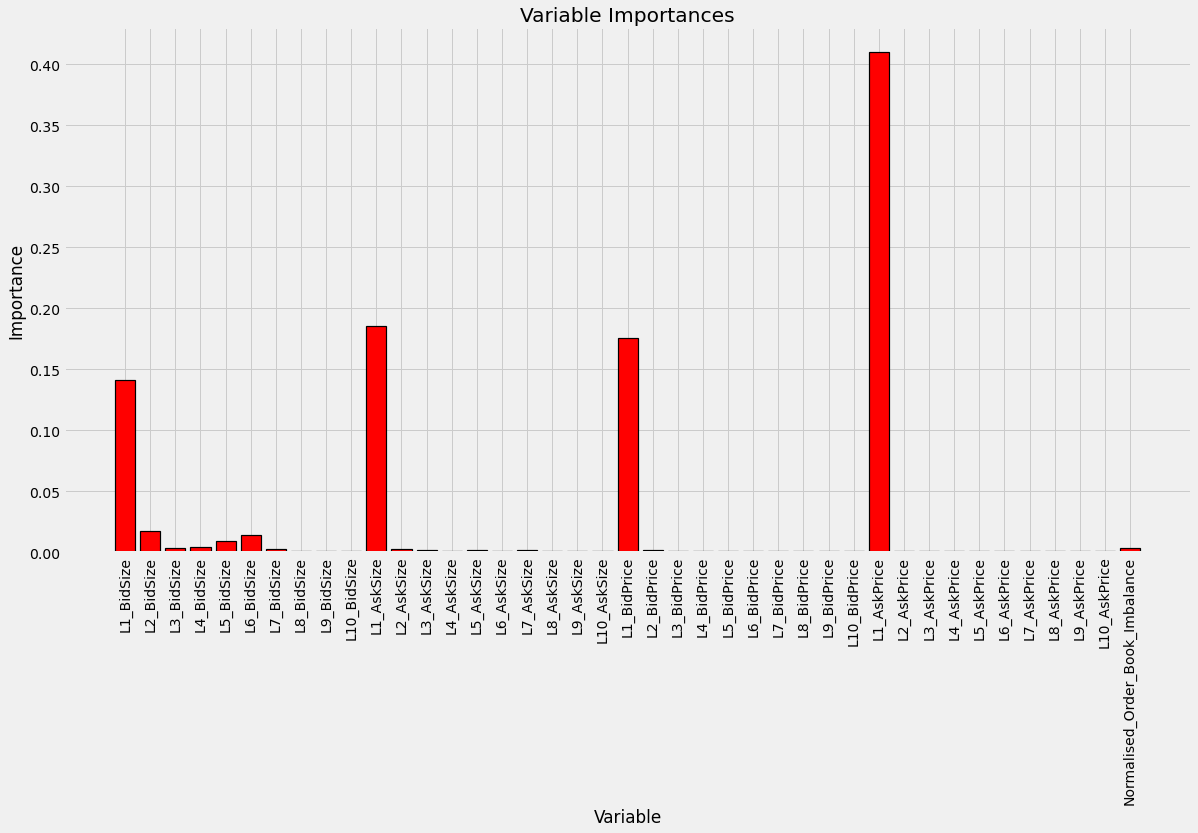

In [89]:
# Reset style 
plt.style.use('fivethirtyeight')

plt.figure(figsize = (18,9))

# list of x for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, original_feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

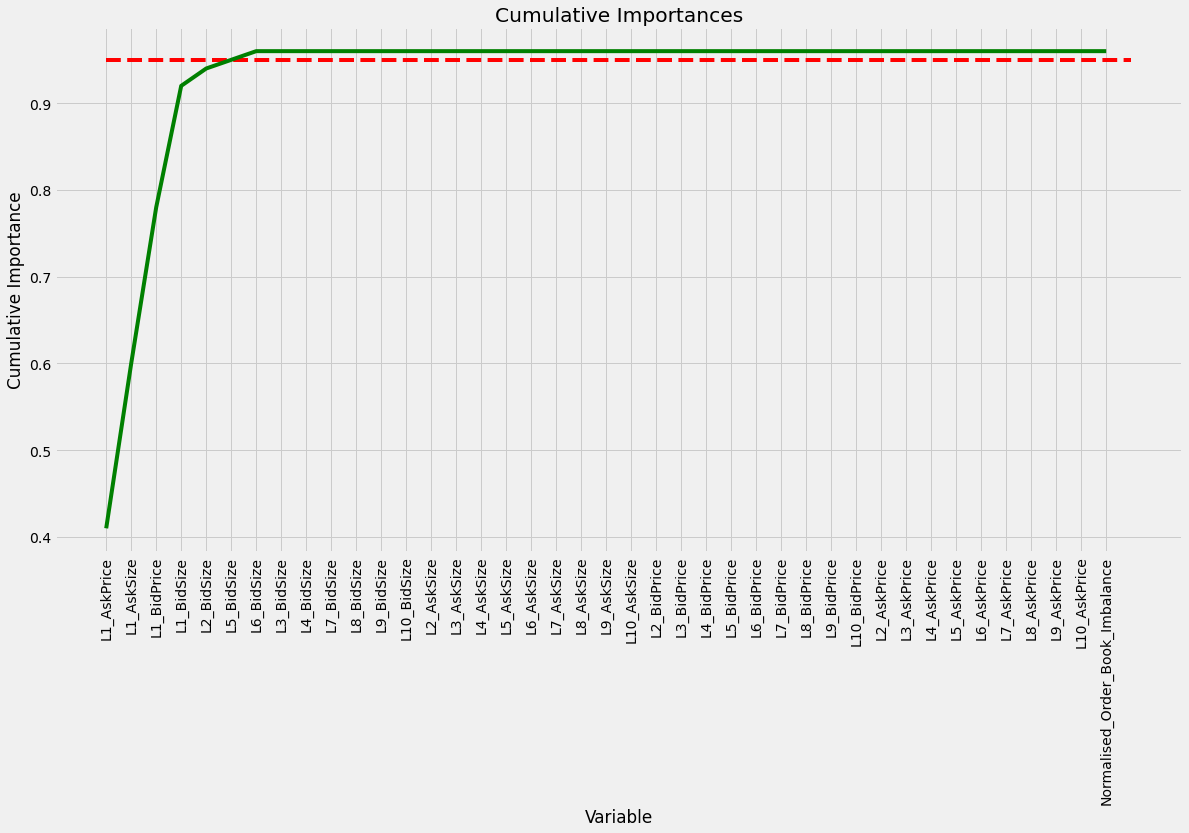

In [91]:
plt.figure(figsize = (18,9))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### Limit Number of Features

We will now reduce the number of features in use by the model to only those required to account for 95% of the importance. The same number of features must be used in the training and testing sets.

In [92]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


In [95]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [original_feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = original_train_features[:, important_indices]
important_test_features = original_test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (35408, 6)
Important test features shape: (11803, 6)


### Training on Important Features

In [98]:
# Train the expanded model on only the important features
rf.fit(important_train_features, original_train_labels)

### Evaluate on Important features

In [101]:
# Make predictions on test data
predictions = rf.predict(important_test_features)

# Performance metrics
errors = abs(predictions - original_test_labels)

print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.0174
Accuracy: 10.03 %.


# Improving Random Forest

In [104]:
# One Hot Encoding
features = pd.get_dummies(level_2)

# Extract features and labels
labels = features['L1_Liquidity_Cost']
features = features.drop('L1_Liquidity_Cost', axis = 1)

# List of features for later use
feature_list = list(features.columns)


features = np.array(features)
labels = np.array(labels)


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [105]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (35408, 41)
Training Labels Shape: (35408,)
Testing Features Shape: (11803, 41)
Testing Labels Shape: (11803,)


### Restrict to most important features

These were the six features required to reach a total feature importance of 95% in the first improving random forest notebook. We will use only these features in order to speed up the model.

In [106]:
# Names of six importances accounting for 95% of total importance
important_feature_names = ['L1_AskPrice', 'L1_AskSize', 'L1_BidPrice', 'L1_BidSize', 'L2_BidSize', 'L5_BidSize']

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (35408, 6)
Important test features shape: (11803, 6)


In [107]:
# Use only the most important features
train_features = important_train_features[:]
test_features = important_test_features[:]

# Update feature list for visualizations
feature_list = important_feature_names[:]

### Examine the Default Random Forest to Determine Parameters

In [110]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [113]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 104.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 252.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

### Evaluate Function

In [116]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [117]:
# Evaluate the Default Model
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.0174 degrees.
Accuracy = 10.03%.


In [118]:
# Evaluate the Best Random Search Model
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.0178 degrees.
Accuracy = 6.76%.


### Grid Search

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
evaluate(best_grid, test_features, test_labels)

### Additional Round of Grid Search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

grid_search_ad.fit(train_features, train_labels)

In [ ]:
grid_search_ad.best_params_

In [ ]:
best_grid_ad = grid_search_ad.best_estimator_
evaluate(best_grid_ad, test_features, test_labels)

### Final Model

In [ ]:
print('Model Parameters:\n')
pprint(best_grid.get_params())
print('\n')
evaluate(best_grid, test_features, test_labels)

# Lasso

mse 0.3100503507092104
R^2 score 0.44219965342596834


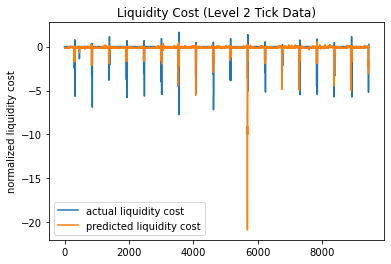

In [46]:
############ Lasso model ###############

from sklearn import linear_model
from sklearn.metrics import r2_score

clf = linear_model.Lasso(alpha=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('mse',mean_squared_error(y_test, y_pred))
print('R^2 score', r2_score(y_test, y_pred))

pyplot.plot(y_test, label='actual liquidity cost')
pyplot.plot(y_pred, label='predicted liquidity cost')
pyplot.xlabel('')
pyplot.ylabel('normalized liquidity cost')
pyplot.title('Liquidity Cost (Level 2 Tick Data)')
pyplot.legend()
pyplot.show()